In [1]:
import os
from github import Github
from dotenv import load_dotenv
import networkx as nx
import csv
import numpy as np
#import plt
import matplotlib.pyplot as plt

#create an empty graph
G = nx.Graph()

In [2]:
#create edges bwtween repositories and languages
with open('dataset/repos.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of languages into an array of strings
        row[2], row[5], row[6] = tuple(x.replace(' ', '').replace('[', '').replace(']', '').replace('"', '').split(',') for x in (row[2], row[5], row [6]))
        # Add the edges between the repository and the languages
        for lang in row[5]:
            G.add_edge(row[0], lang, color="#FF8CCD")
        
nx.info(G)


/var/folders/dn/3rzmgvf53gv2ssvdr1f517gc0000gn/T/ipykernel_4533/1002404047.py:13: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 1228 nodes and 1992 edges'

In [4]:
# Open the CSV file and read the data for users
with open('dataset/users.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of repositories into an array of strings
        row[2:4] = [x.replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').replace(' "', '').split(',') for x in row[2:4]]
        # Add the user node to graph with blue color
        G.add_node(row[0], name=row[1], repos=row[2], commits= row[3], color="#7FB2FD")
        # Add edges between the user and their repositories
        for repo in row[2]:
            G.add_edge(row[0], repo, color="#FFD28C")

nx.info(G)

/var/folders/dn/3rzmgvf53gv2ssvdr1f517gc0000gn/T/ipykernel_4546/2489458761.py:15: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 2445 nodes and 4241 edges'

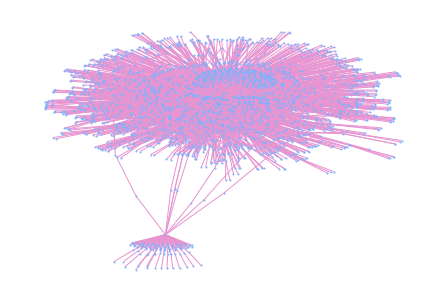

In [7]:
#draw graph with space between nodes
nx.draw(G, with_labels=False, node_size=1, node_color="#7FB2FD", edge_color="#e795d1", font_size=8, font_color="#000000")

plt.show()


In [ ]:
# Set the layout of the graph
pos = nx.kamada_kawai_layout(G)

# Draw the nodes and edges of the graph
nx.draw(G, pos, node_size=200, node_color="#7FB2FD", edge_color="#FF8CCD", with_labels=True, font_size=8)

# Draw the labels of the repositories at an angle to reduce overlap
repo_labels = nx.get_node_attributes(G, "name")
repo_pos = {k: (v[0], v[1]-0.1) for k, v in pos.items() if k in repo_labels}
nx.draw_networkx_labels(G, repo_pos, labels=repo_labels, font_size=8, font_color="k", alpha=1)

# Draw the labels of the users on top of the nodes
user_labels = nx.get_node_attributes(G, "name")
nx.draw_networkx_labels(G, pos, labels=user_labels, font_size=8, font_color="k", alpha=1)

# Show the graph
plt.show()